# ITMAL Exercise

REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0206| CEF, updated and spell checked. 
2018-0207| CEF, made Qh optional.
2018-0208| CEF, added PYTHONPATH for windows.
2018-0212| CEF, small mod in itmalutils/utils.
2019-0820| CEF, E19 ITMAL update.
2020-0125| CEF, F20 ITMAL update.
2020-0806| CEF, E20 ITMAL update, udpated figs paths.
2020-0907| CEF, added text on OPRG and OOP for EE's
2020-0929| CEF, added elaboration for journal in Qa+b.

## Python Basics

### Modules and Packages in Python

Reuse of code in Jupyter notebooks can be done by either including a raw python source as a magic command

```python
%load filename.py
```
but this just pastes the source into the notebook and creates all kinds of pains regarding code maintenance.

A better way is to use a python __module__. A module consists simply (and pythonic) of a directory with a module init file in it (possibly empty) 
```python
libitmal/__init__.py
```
To this directory you can add modules in form of plain python files, say
```python
libitmal/utils.py
```
That's about it! The `libitmal` file tree should now look like
```
libitmal/
├── __init__.py
├── __pycache__
│   ├── __init__.cpython-36.pyc
│   └── utils.cpython-36.pyc
├── utils.py
```
with the cache part only being present once the module has been initialized.

You should now be able to use the `libitmal` unit via an import directive, like
```python
import numpy as np
from libitmal import utils as itmalutils

print(dir(itmalutils))
print(itmalutils.__file__)

X = np.array([[1,2],[3,-100]])
itmalutils.PrintMatrix(X,"mylabel=")
itmalutils.TestAll()
```

#### Qa Load and test the `libitmal` module

Try out the `libitmal` module from [GITMAL]. Load this module and run the function

```python
from libitmal import utils as itmalutils
utils.TestAll()
```
from this module.

##### Implementation details

Note that there is a python module ___include___ search path, that you may have to investigate and modify. For my Linux setup I have an export or declare statement in my .bashrc file, like

```bash
declare -x PYTHONPATH=~/ASE/ML/itmal:$PYTHONPATH
```
but your ```itmal```, the [GITMAL] root dir, may be placed elsewhere.

For ___Windows___, you have to add `PYTHONPATH` to your user environment variables...see screenshot below (enlarge by modding the image width-tag or find the original png in the Figs directory).

<img src="https://blackboard.au.dk/bbcswebdav/courses/BB-Cou-UUVA-94506/Fildeling/L01/Figs/Screenshot_windows_enviroment_variables.png" alt="WARNING: you need to be logged into Blackboard to view images" style="width:350px">

or if you, like me, hate setting up things in a GUI, and prefer a console, try in a CMD on windows

```bash
CMD> setx.exe PYTHONPATH "C:\Users\auXXYYZZ\itmal"
```

replacing the username and path with whatever you have. If everything fails you could programmatically add your path to the libitmal directory as

```python
import sys,os
sys.path.append(os.path.expanduser('~/itmal'))

from libitmal import utils as itmalutils
print(dir(itmalutils))
print(itmalutils.__file__)
```

For the journal: remember to document your particular PATH setup.

In [90]:
import sys,os
sys.path.append(os.path.expanduser('~/itmal'))
print(sys.path)

from libitmal import utils as itmalutils
itmalutils.TestAll()
itmalutils.isList([1,2])

['C:\\Users\\andre\\Google Drev\\Civil - Mekanik\\3. Semester\\ITMAL\\ITMAL\\itmal\\L01', 'C:\\Users\\andre\\Google Drev\\Civil - Mekanik\\3. Semester\\ITMAL\\ITMAL\\itmal', 'C:\\Users\\andre\\anaconda3\\python38.zip', 'C:\\Users\\andre\\anaconda3\\DLLs', 'C:\\Users\\andre\\anaconda3\\lib', 'C:\\Users\\andre\\anaconda3', '', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\andre\\.ipython', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal', 'C:\\Users\\andre/itmal',

True

#### Qb Create your own module, with some functions, and test it

Now create your own module, with some dummy functionality. Load it and run you dummy function in a Jupyter Notebook.

Keep this module at hand, when coding, and try to capture reusable python functions in it as you invent them!

For the journal: remember to document your particular library setup (where did you place files, etc).

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', 'cxyplot', 'plt']


<module 'matplotlib.pyplot' from 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

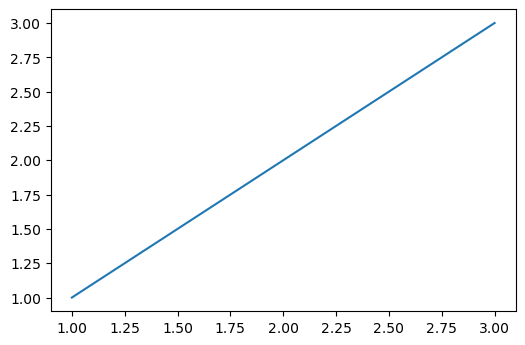

In [16]:
# TODO: Qb...
from libitmal import plotting as cplot
print(dir(cplot))
cplot.cxyplot([1,2,3], [1,2,3])




#### Qc How do you 'recompile' a module?

When changing the module code, Jupyter will keep running on the old module. How do you force the Jupyter notebook to re-load the module changes? 

<module 'matplotlib.pyplot' from 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

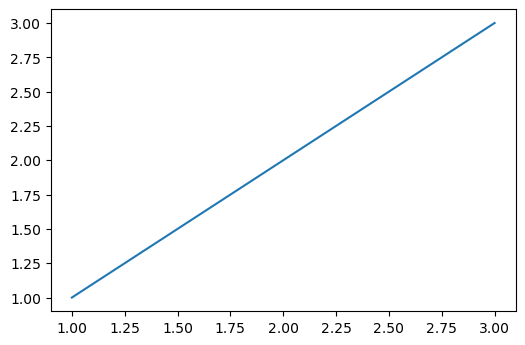

In [15]:
# TODO: Qc...
from importlib import reload #Denne funktion er god til at genindlæse et modul, når man ændrer i det. 
reload(cplot) #Her bruges den på cplot. 
 
cplot.cxyplot([1,2,3], [1,2,3])


#### [OPTIONAL] Qd Write a Howto on Python Modules a Packages

Write a short description of how to use modules in Python (notes on modules path, import directives, directory structure, etc.)

In [ ]:
# TODO: Qd...

### Classes in Python

Good news: Python got classes. Bad news: they are somewhat obscure compared to C++ classes. 

Though we will not use object-oriented programming in Python intensively, we still need some basic understanding of Python classes. Let's just dig into a class-demo, here is `MyClass` in Python

```python
class MyClass:
    myvar = "blah"

    def myfun(self):
        print("This is a message inside the class.")

myobjectx = MyClass()
```

NOTE: The following exercise assumes some C++ knowledge, in particular the OPRG and OOP courses. If you are an EE-student, then ignore the cryptic C++ comments, and jump directly to some Python code instead. It's the Python solution here, that is important!

#### Qe Extend the class with some public and private functions and member variables

How are private function and member variables represented in python classes? 

What is the meaning of `self` in python classes?

What happens to a function inside a class if you forget `self` in the parameter list, like `def myfun():` instead of `def myfun(self):` and you try to call it like `myobjectx.myfun()`? Remember to document the demo code and result.


[OPTIONAL] What does 'class' and 'instance variables' in python correspond to in C++? Maybe you can figure it out, I did not really get it reading, say this tutorial

> https://www.digitalocean.com/community/tutorials/understanding-class-and-instance-variables-in-python-3

In [42]:
# TODO: Qe...
class MyClass:
    myvar = "blah"

    def myfun(self):
        print("This is a message inside the class.")

myobjectx = MyClass()
myobjectx.myfun()

This is a message inside the class.


In [45]:
# TODO: Qe...
class MyClass:
    myvar = "blah"

    def myfun():
        print("This is a message inside the class.")

myobjectx = MyClass()
myobjectx.myfun()

TypeError: myfun() takes 0 positional arguments but 1 was given

The meaning of the self is to reference to the current instance of the class, i.e. accessing the specific instance of the class' variables f.x. 
If the self is not present in the function, it cannot be called from the specific instance of the object, as it is not contained in it "self" from the objects POV.

#### Qf Extend the class with a Constructor

Figure a way to declare/define a constructor (CTOR) in a python class. How is it done in python?

Is there a class destructor in python (DTOR)? Give a textual reason why/why-not python has a DTOR?

Hint: python is garbage collection like in C#, and do not go into the details of `__del__, ___enter__, __exit__` functions...unless you find it irresistible to investigate.

In [50]:
# TODO: Qf...
#There is a class constructur. It's as follows: 
class MyClass:
    def __init__(self,name):
        self.name = name
    myvar = "blah"

    def myfun(self):
        print("This is a message inside the class:" + self.name)

myobjectx = MyClass("Herp")
myobjectx.myfun()

This is a message inside the class:Herp


The Destructer is assumed in python, even if not defined. Anyways, it's on the form: ` def __del__(self):` 
It can be called by `del obj`

#### Qg Extend the class with a to-string function

Then find a way to serialize a class, that is to make some `tostring()` functionality similar to a C++ 

```C++
friend ostream& operator<<(ostream& s,const MyClass& x)
{
    return os << ..
}
```

In [63]:
# TODO: Qg...
foo = dict(int_list=[3, 4, 5],  text='Hello World', number=9.99, boolean=False, none=None)
import pickle
serialised = pickle.dumps(foo) #For serialization
print(serialised)

unserialised = pickle.loads(serialised)
print(unserialised)

b'\x80\x04\x95T\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x08int_list\x94]\x94(K\x03K\x04K\x05e\x8c\x04text\x94\x8c\x0bHello World\x94\x8c\x06number\x94G@#\xfa\xe1G\xae\x14{\x8c\x07boolean\x94\x89\x8c\x04none\x94Nu.'
{'int_list': [3, 4, 5], 'text': 'Hello World', 'number': 9.99, 'boolean': False, 'none': None}


#### [OPTIONAL] Qh Write a Howto on Python Classes 

Write a _How-To use Classes Pythonically_, including a description of public/privacy, constructors/destructors, the meaning of `self`, and inheritance.

In [ ]:
# TODO: Qh...
